In [1]:
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Définition d'une fonction python
---
### Calcul de $T_a$ et $T_s$ en fonction des paramètres $S_0$, $R$, $\alpha$, $\varepsilon_a$ et $\varepsilon_s$
---

In [12]:
# CONSTANTES

R = 6373 #[km], rayon de la Terre *
SB = 5.670E-8 # [W m^-2 K^-4], Constante de Stefan-Boltzmann *
S_0 = 1365 #[W m^-2], Constante solaire (du problème)
ep_s = 1
ep_a = 0.77
alpha = 0.3 #Albédo 
# * (Petty, appendix D, p.447)

Nous choisissons les valeurs ci-dessus comme constantes, car elles ne varient pas dans le cadre de cet exercice spécifique. $R$ et $S_0$ ne varient normalement pas, et $\sigma$ est une constante par définition

In [3]:
# FONCTIONS

# T-func()
# > PARAMS :  
# S_0, la constante solaire (int)
# alpha, l'albédo terrestre (float)
# ep_s, l'émissivité de surface (float)
# ep_a, l'émissivité de l'atmosphère (float)
# > RETURNS : 
# T_a, la température de l'atmosphère (float) [K]
# T_s, la température de surface (float) [K]          

def T_func(S_0, alpha, ep_s, ep_a):
    # TEMPÉRATURE DE SURFACE
    global SB
    # Le numérateur et dénominateur de la fonction
    # sont séparés pour la lisibilité seulement
    num = (1-alpha)*S_0
    denom = 4*SB*(ep_s-(ep_a/2))
    
    T_s = (num/denom)
    
    #TEMPÉRATURE DE L'ATMOSPHÈRE
    
    T_a = ep_s*T_s*(1/2)
    
    return T_s**(1/4), T_a**(1/4) #Renvoie un tuple (T_s, T_a)


In [4]:
#FONCTION
# > PARAMS:
# pos, 0 ou 1, selon qu'on cherche à calculer T_s ou T_a (int)
# param, "alpha", "ep_s" ou "ep_a", selon le paramètre variable (string)
# val_array, l'ensemble des valeurs que prend la valeur param (array 1xn)
# > RETURN:
# L'array des températures, variantes selon le param sélectionné (array 1xn)

def T_array(pos, param, val_array):
    T_array=[]
    global S_0
    global R
    global ep_s
    global ep_a
    global alpha
    #Constantes, selon le cas
    
    if param == "alpha":
        for value in val_array:
            T_array.append(T_func(S_0, value, ep_s, ep_a)[pos])
            
    elif param == "ep_a":
        for value in val_array:
            T_array.append(T_func(S_0,alpha, ep_s, value)[pos])
            
    elif param == "ep_s":
        for value in val_array:
            T_array.append(T_func(S_0,alpha, value, ep_a)[pos])
    
    return np.array([T_array])


In [5]:
# Valeurs de alpha ou epsilon_a, entre +/- 50% de leur valeur
#VARIATIONS À RETRAVAILLER : (Stephens, 2015)

def var_variation(var_value):
    variations = np.array([5*i/100 for i in range(11)]) 
    
    var_array =  np.concatenate(#Concaténation
        (np.flip( #Inverse du 1er array (valeurs plus basses)
            np.array([var_value-variations*var_value]), axis=1
        )[:,1:9],
         np.array([var_value+variations*var_value]) #Valeurs plus hautes
        ), axis=1)
    return var_array[var_array<=1]

In [6]:
var_variation(alpha)

array([0.165, 0.18 , 0.195, 0.21 , 0.225, 0.24 , 0.255, 0.27 , 0.3  ,
       0.315, 0.33 , 0.345, 0.36 , 0.375, 0.39 , 0.405, 0.42 , 0.435,
       0.45 ])

In [13]:
var_variation(ep_a)

array([0.4235, 0.462 , 0.5005, 0.539 , 0.5775, 0.616 , 0.6545, 0.693 ,
       0.77  , 0.8085, 0.847 , 0.8855, 0.924 , 0.9625])

In [14]:
0.462-0.4235

0.038500000000000034

# Tests de sensibilité à des variations sur $\alpha$ pour $T_a$ et $T_s$

In [7]:
# Valeurs de alpha ou epsilon_a, entre 0 et 1
#VARIATIONS À RETRAVAILLER : (Stephens, 2015)
# Voir pour des variations de +/- 10% de la valeur actuelle
# TODO
# var_values = np.array([5*i/100 for i in range(11)]) 
# print(var_values)
# print(alpha+var_values*alpha)
# print(np.array(alpha-var_values*alpha)[1:9])

In [8]:
# Valeurs de températures variables

#Selon alpha
T_s_alpha = T_array(0,
                    "alpha",
                    var_variation(alpha))

T_a_alpha = T_array(1,
                    "alpha",
                    var_variation(alpha))

#Selon ep_a
T_s_epa = T_array(0,
                  "ep_a",
                  var_variation(ep_a))

T_a_epa = T_array(1,
                  "ep_a",
                  var_variation(ep_a))

print(T_s_alpha, "\n",T_a_alpha)

[[300.65971414 299.30025334 297.92201141 296.52437157 295.10668457
  293.66826636 292.20839547 290.72631018 287.69222916 286.13847896
  284.55899741 282.9527677  281.31870843 279.65566783 277.96241745
  276.23764493 274.47994608 272.68781581 270.85963801]] 
 [[252.82367584 251.68051012 250.52155142 249.34628109 248.15415317
  246.94459245 245.71699225 244.47071205 241.9193642  240.61282122
  239.28464085 237.93396805 236.55989346 235.16144859 233.73760041
  232.28724538 230.80920272 229.3022068  227.76489864]]


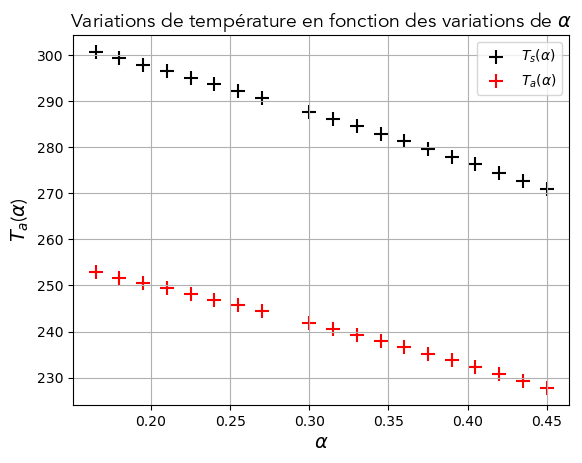

In [9]:
#Plot pour variations d'alpha
plt.scatter(var_variation(alpha), T_s_alpha, marker="+",s=100, color="black", label=r"$T_s$($\alpha$)")
plt.scatter(var_variation(alpha), T_a_alpha, marker="+",s=100, color="red", label=r"$T_a$($\alpha$)")
plt.title(r"Variations de température en fonction des variations de $\alpha$", font="Avenir",size=14)
plt.xlabel(r"$\alpha$", font="Avenir",size=14)
plt.ylabel(r"$T_a$($\alpha$)", font="Avenir",size=14)
plt.legend()
plt.grid()
plt.savefig("figures/0D_TA_a_v2.png",dpi=300)
plt.show()

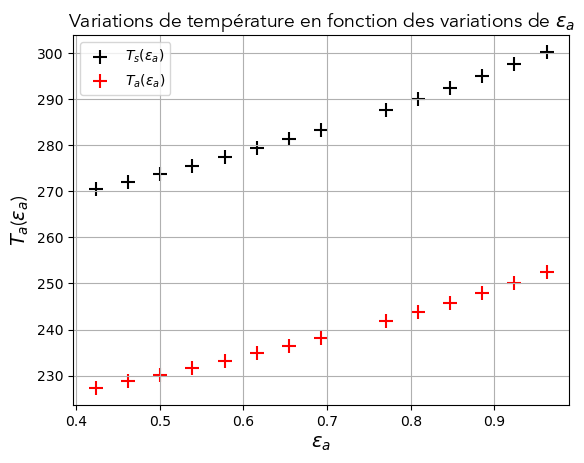

In [15]:
#Plot pour variations d'epsilon_a
plt.scatter(var_variation(ep_a), T_s_epa, marker="+",s=100, color="black", label=r"$T_s$($\varepsilon_a$)")
plt.scatter(var_variation(ep_a), T_a_epa, marker="+",s=100, color="red", label=r"$T_a$($\varepsilon_a$)")
plt.title(r"Variations de température en fonction des variations de $\varepsilon_a$", font="Avenir",size=14)
plt.xlabel(r"$\varepsilon_a$", font="Avenir",size=14)
plt.ylabel(r"$T_a$($\varepsilon_a$)", font="Avenir",size=14)
# plt.xlim([0.4,1])
plt.legend()
plt.grid()
plt.savefig("figures/0D_TA_epa_v2.png",dpi=300)
plt.show()